# **Clone Repository & Setup Project**

In [13]:
# ============================
# Project Setup
# ============================

!git clone https://github.com/Rodexxx24/credit-scoring-ml.git

Cloning into 'credit-scoring-ml'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 114 (delta 30), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 215.67 KiB | 2.07 MiB/s, done.
Resolving deltas: 100% (30/30), done.


# **Masuk ke Direktori Proyek**

In [14]:
%cd credit-scoring-ml

/content/credit-scoring-ml/credit-scoring-ml/credit-scoring-ml


# **Verifikasi Struktur Folder**

In [15]:
!ls

data  models  notebooks  README.md  requirements.txt  results  src


# **Setup Environment**

In [16]:
# ============================
# Modelling ML - Setup
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import joblib

sns.set_theme(style="whitegrid")
plt.style.use("default")

# **Load Preprocessed Data & Preprocessor**

In [17]:
# ============================
# Load Preprocessed Data
# ============================

X_train = np.load("data/processed/X_train_processed.npy")
X_test  = np.load("data/processed/X_test_processed.npy")
y_train = np.load("data/processed/y_train.npy")
y_test  = np.load("data/processed/y_test.npy")

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (800, 48)
Test shape: (200, 48)


# **Helper Function Evaluasi**

In [20]:
# ============================
# Evaluation Function
# ============================

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_prob) # y_test is already 0 or 1

    print(f"=== {model_name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("AUC      :", auc)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "AUC": auc
    }

# **Logistic Regression (Baseline)**

=== Logistic Regression ===
Accuracy : 0.74
Precision: 0.5465116279069767
Recall   : 0.7833333333333333
F1-score : 0.6438356164383562
AUC      : 0.8072619047619047


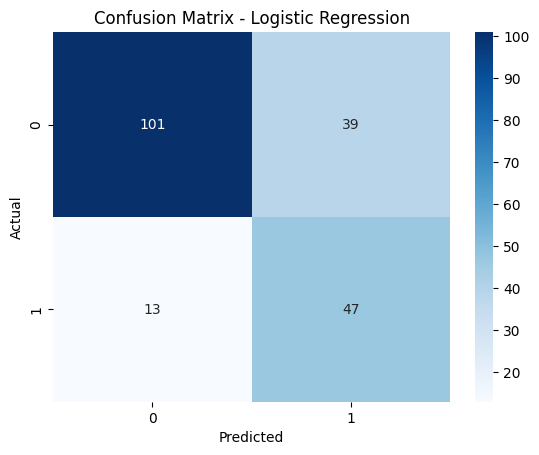

In [21]:
# ============================
# Logistic Regression
# ============================

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

lr.fit(X_train, y_train)

lr_results = evaluate_model(
    lr, X_test, y_test, "Logistic Regression"
)

# **Random Forest**

=== Random Forest ===
Accuracy : 0.765
Precision: 0.696969696969697
Recall   : 0.38333333333333336
F1-score : 0.4946236559139785
AUC      : 0.7902380952380952


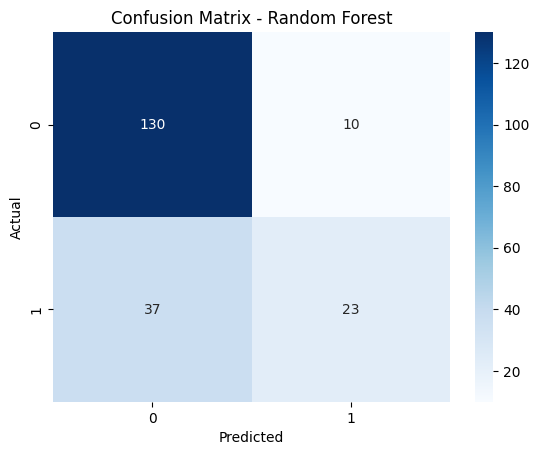

In [22]:
# ============================
# Random Forest
# ============================

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

rf_results = evaluate_model(
    rf, X_test, y_test, "Random Forest"
)

# **XGBoost**

=== XGBoost ===
Accuracy : 0.785
Precision: 0.673469387755102
Recall   : 0.55
F1-score : 0.6055045871559633
AUC      : 0.8054761904761906


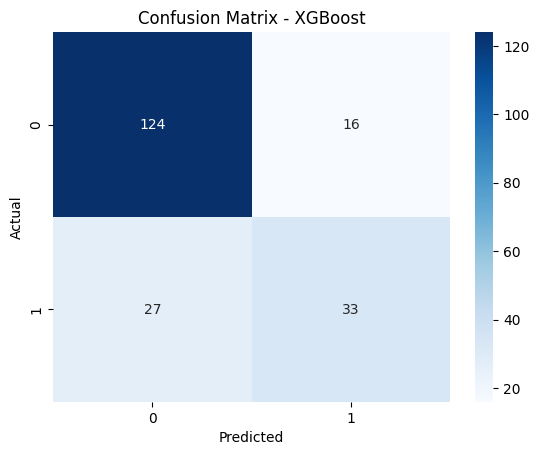

In [23]:
# ============================
# XGBoost
# ============================

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_results = evaluate_model(
    xgb, X_test, y_test, "XGBoost"
)

# **Perbandingan Model**

In [24]:
# ============================
# Model Comparison
# ============================

results_df = pd.DataFrame([
    lr_results,
    rf_results,
    xgb_results
])

results_df

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.740,0.546512,0.783333,0.643836,0.807262
1,Random Forest,0.765,0.696970,0.383333,0.494624,0.790238
2,XGBoost,0.785,0.673469,0.550000,0.605505,0.805476


# **Simpan Model Terbaik**

In [26]:
# ============================
# Save Best Model
# ============================

joblib.dump(xgb, "models/xgboost_credit_scoring.joblib")
joblib.dump(lr, "models/logistic_regression.joblib")
joblib.dump(rf, "models/random_forest.joblib")

['models/random_forest.joblib']